# World Happiness Report Project

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Data Exploration and preprocessing 

In [56]:
data=pd.read_csv('/Users/rekhagrg/downloads/happiness_score_dataset.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [58]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [59]:
data.shape

(158, 12)

In [60]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [61]:
#change data type of county from int to float
data['Happiness Rank']=data['Happiness Rank'].astype('float')
data.dtypes

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [63]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [64]:
#check for missing value
print(data.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


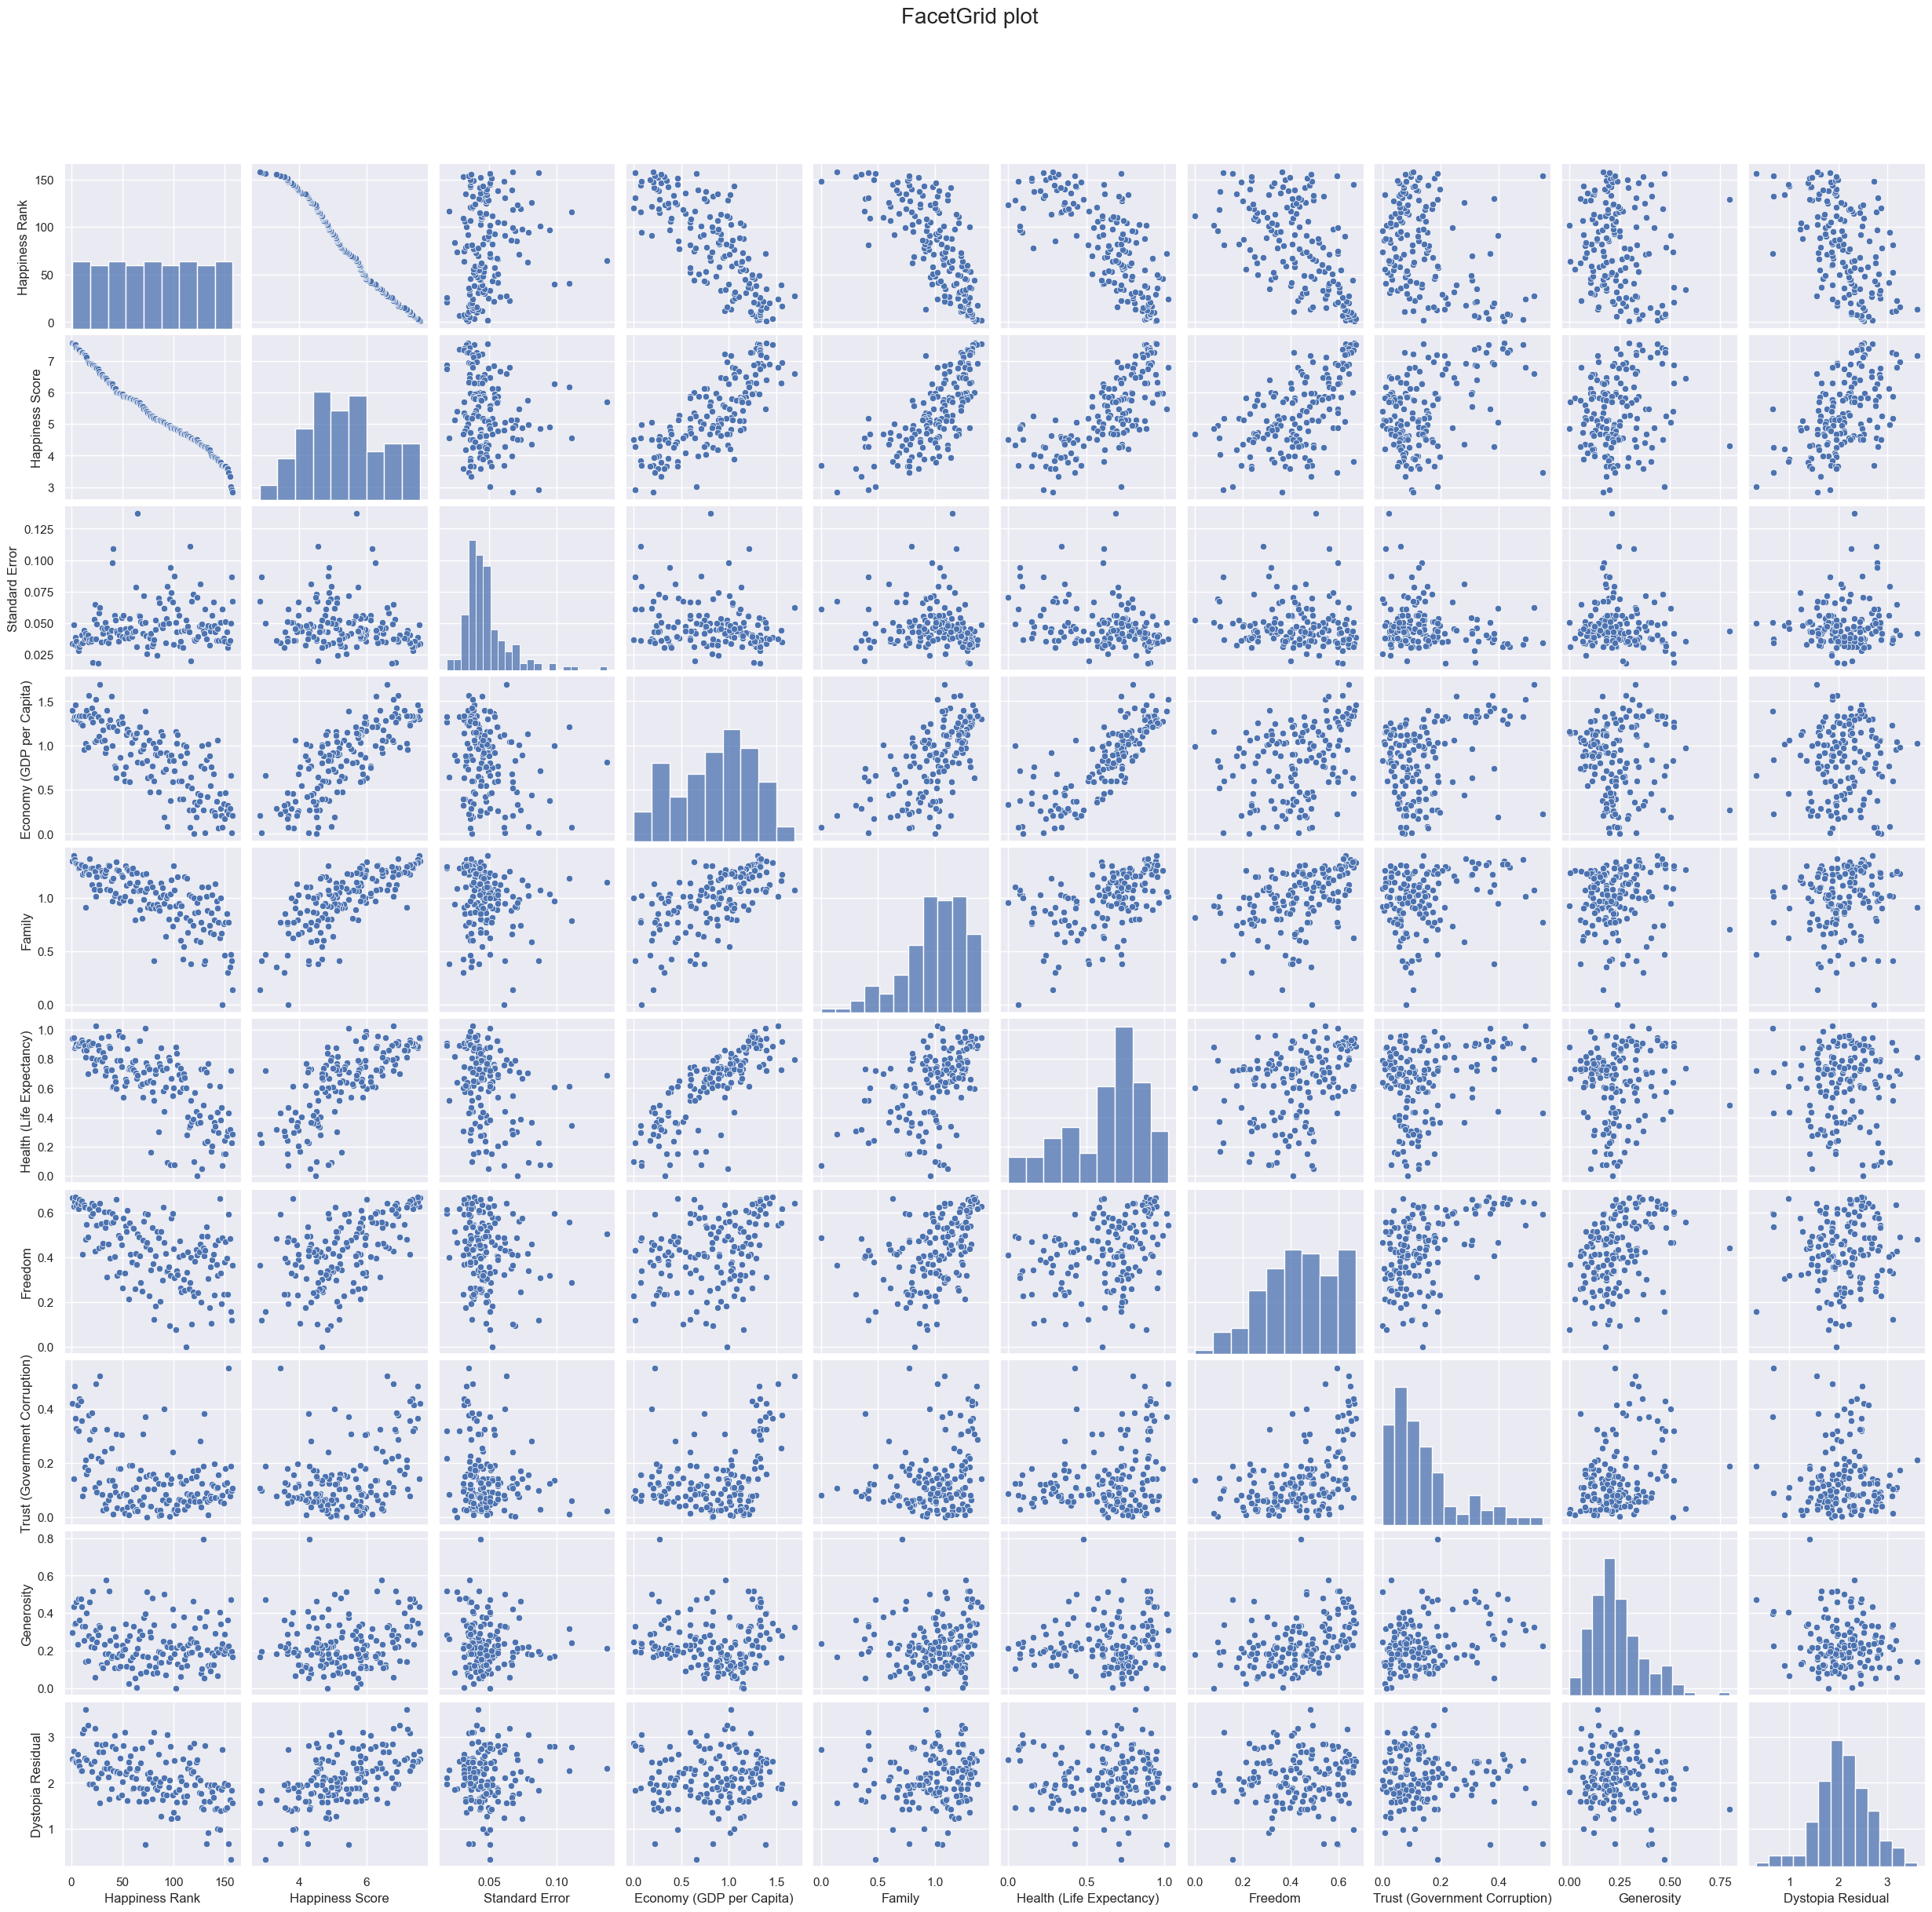

In [85]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [66]:
#creating a list of attributes
economy_happi=['Happiness Score','Economy (GDP per Capita)']
#creating a dataframe
economy_corr=data[economy_happi]

#finding correlation
economy_corr.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.000000,0.780966
Economy (GDP per Capita),0.780966,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

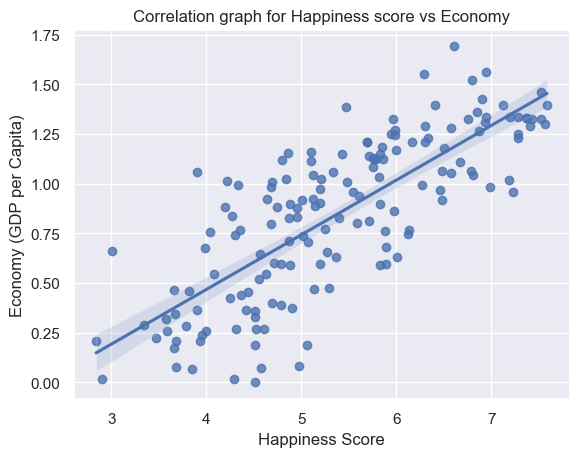

In [70]:
sns.regplot(data = economy_corr, x = 'Happiness Score', y = 'Economy (GDP per Capita)').set_title("Correlation graph for Happiness score vs Economy")

So from above what we can see strong corelation and the greater economy (GDP) is more Happiness score.

In [71]:
#family
fam_happiness = ['Happiness Score','Family']

fam_corr = data[fam_happiness]

fam_corr.corr()

,Happiness Score,Family
Happiness Score,1.000000,0.740605
Family,0.740605,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Family')

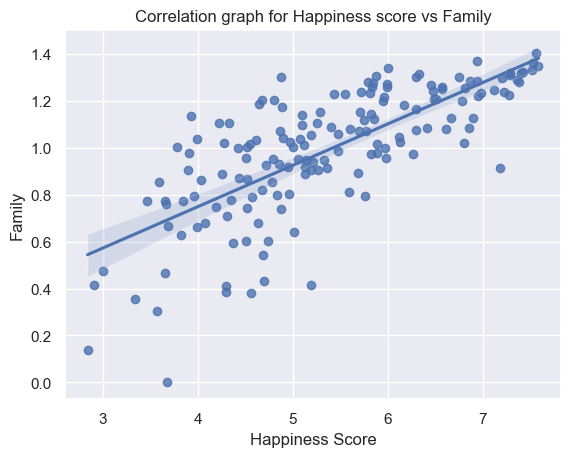

In [72]:
#family plot
sns.regplot(data = fam_corr, x = 'Happiness Score', y = 'Family').set_title("Correlation graph for Happiness score vs Family")

from the graph, it suggests that family and happiness indeed go together. However, given the many outliers, one cannot assume that happiness is always dependent upon family.Lets explore other factors.

In [73]:
#Dystopia
dyst_happiness = ['Dystopia Residual','Happiness Score']

dyst_corr = data[dyst_happiness]

dyst_corr.corr()

,Dystopia Residual,Happiness Score
Dystopia Residual,1.000000,0.530474
Happiness Score,0.530474,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Dystopia Residual')

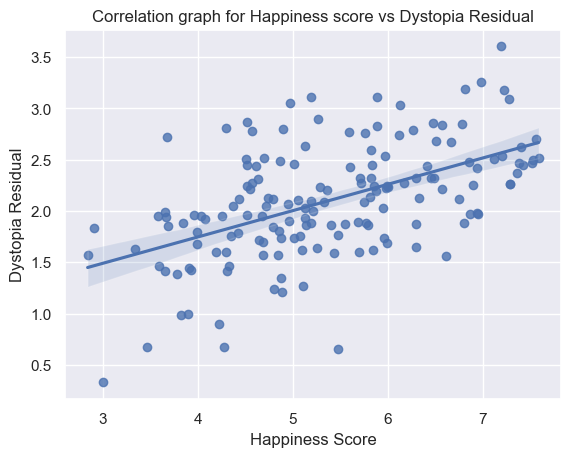

In [74]:
#Distopia Plot
sns.regplot(data = dyst_corr, x = 'Happiness Score', y = 'Dystopia Residual').set_title("Correlation graph for Happiness score vs Dystopia Residual")

This graph not well correlated, but the data does show something interesting.Along with that we can see outlier as well.

In [83]:
#Freedom
free= ['Freedom','Happiness Score']

free_corr = data[free]

free_corr.corr()

,Freedom,Happiness Score
Freedom,1.000000,0.568211
Happiness Score,0.568211,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Dystopia Residual')

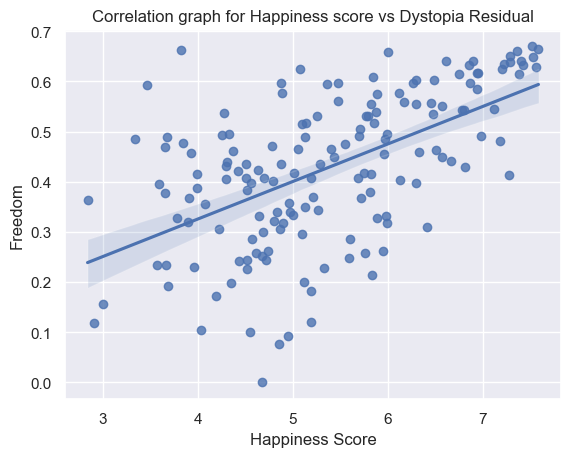

In [84]:
#freedom plot
sns.regplot(data = free_corr, x = 'Happiness Score', y = 'Freedom').set_title("Correlation graph for Happiness score vs Dystopia Residual")

This graph not well correlated, but the data does show something interesting.Along with that we can see outlier as well.

Heatmap

<AxesSubplot:>

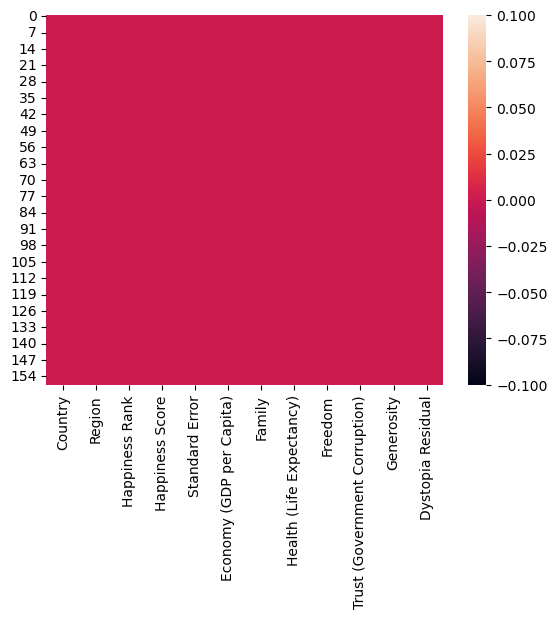

In [9]:
sns.heatmap(data.isnull())

Overview of data 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Description of data

In [11]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The yellow spots show the null values for that column